# **Example Code From: https://www.geeksforgeeks.org/k-means-clustering-introduction/**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import random

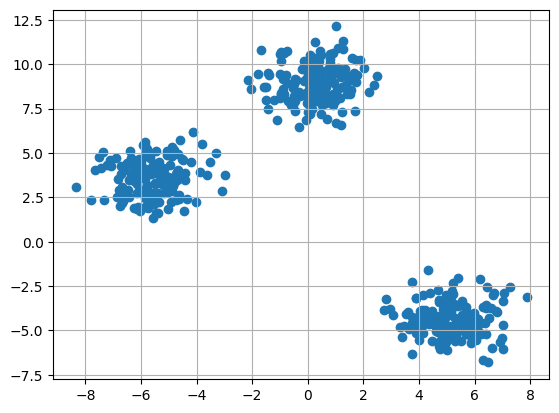

In [ ]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

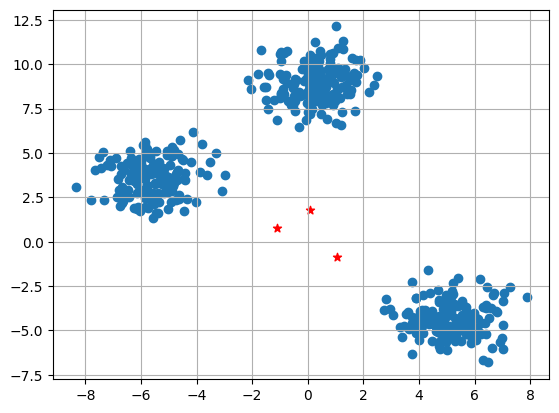

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [ ]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [ ]:
#Implementing E step
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters

In [ ]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [ ]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred_true = pred_cluster(X,clusters)

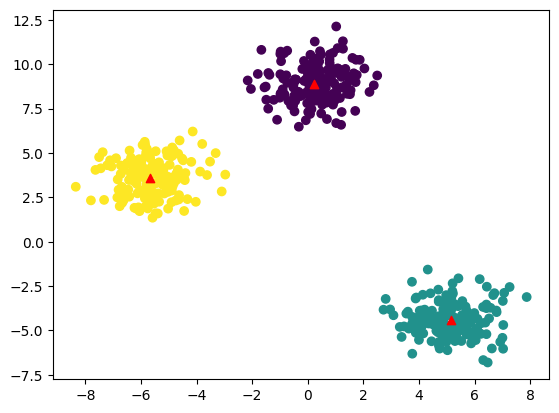

In [ ]:
plt.scatter(X[:,0],X[:,1],c = pred_true)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

# **Poisoning Data Example:**

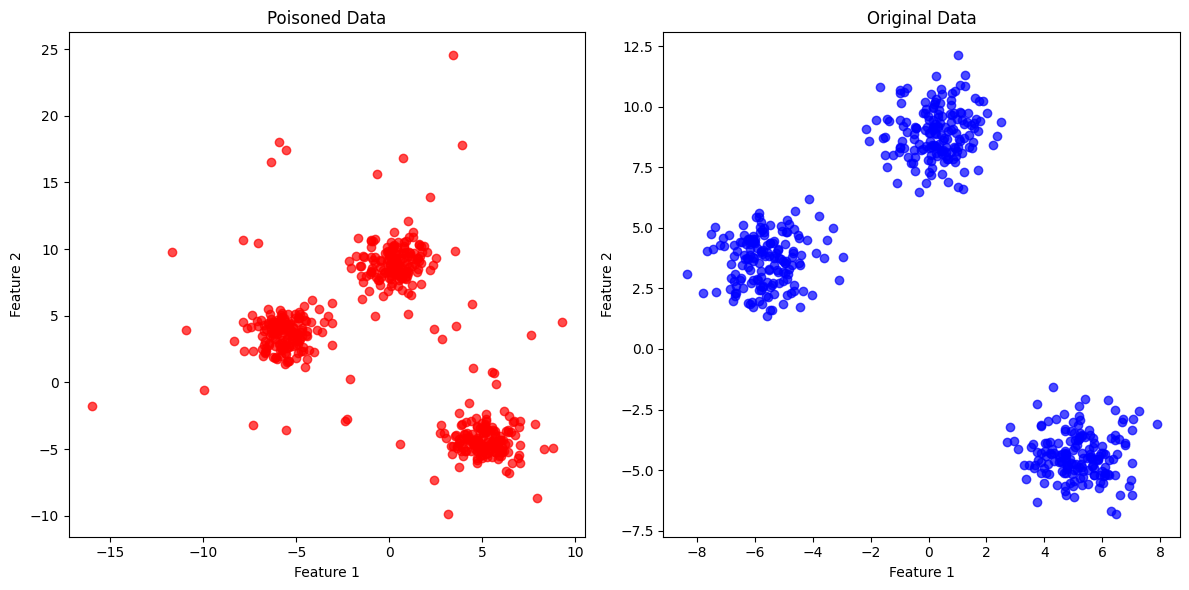

In [ ]:
n_samples = 500
X,y = make_blobs(n_samples = n_samples,n_features = 2,centers = 3,random_state = 23)

n_poisoned_samples = 50
nums = list(range(1, n_samples))
random.shuffle(nums)

X_poisoned = X.copy()
for i in range(n_poisoned_samples):
  poisoned_point = nums[i]
  X_poisoned[poisoned_point] += np.random.normal(loc=0, scale=5.0, size=X[poisoned_point].shape)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_poisoned[:, 0], X_poisoned[:, 1], color='red', alpha=0.7)
plt.title('Poisoned Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.7)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# **Shows how increasing variance and amount of poisoned data affects results**

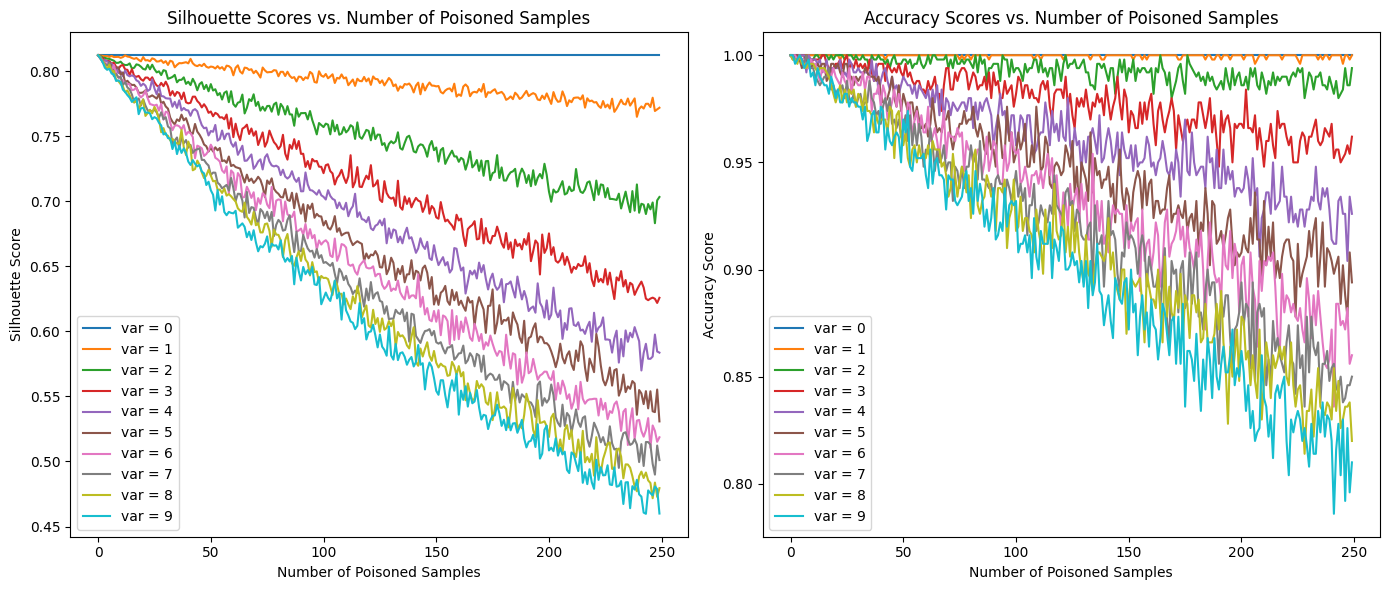

In [ ]:
silhouette_scores_by_var = {}
accuracy_scores_by_var = {}
for var in range(10):
  silhouette_scores_by_var[var] = []
  accuracy_scores_by_var[var] = []
  for j in range(250):
    n_samples = 500
    X,y = make_blobs(n_samples = n_samples,n_features = 2,centers = 3,random_state = 23)

    n_poisoned_samples = j
    nums = list(range(1, n_samples))
    random.shuffle(nums)

    X_poisoned = X.copy()
    for i in range(n_poisoned_samples):
      poisoned_point = nums[i]
      X_poisoned[poisoned_point] += np.random.normal(loc=0, scale=var, size=X[poisoned_point].shape)


    k = 3

    clusters = {}
    np.random.seed(23)

    for idx in range(k):
        center = 2*(2*np.random.random((X_poisoned.shape[1],))-1)
        points = []
        cluster = {
            'center' : center,
            'points' : []
        }

        clusters[idx] = cluster


    clusters = assign_clusters(X_poisoned,clusters)
    clusters = update_clusters(X_poisoned,clusters)
    pred_poison = pred_cluster(X_poisoned,clusters)


    silhouette_poisoned = silhouette_score(X_poisoned, pred_poison)
    silhouette_scores_by_var[var].append(silhouette_poisoned)

    accuracy_poisoned = accuracy_score(y, pred_poison)
    accuracy_scores_by_var[var].append(accuracy_poisoned)



fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

for var, scores in silhouette_scores_by_var.items():
    axes[0].plot(range(250), scores, label=f'var = {var}')

axes[0].set_title('Silhouette Scores vs. Number of Poisoned Samples')
axes[0].set_xlabel('Number of Poisoned Samples')
axes[0].set_ylabel('Silhouette Score')
axes[0].legend()

for var, scores in accuracy_scores_by_var.items():
    axes[1].plot(range(250), scores, label=f'var = {var}')

axes[1].set_title('Accuracy Scores vs. Number of Poisoned Samples')
axes[1].set_xlabel('Number of Poisoned Samples')
axes[1].set_ylabel('Accuracy Score')
axes[1].legend()

plt.tight_layout()
plt.show()